# 프로젝트 : 나만의 사진 편집 프로그램 만들기

* 관련 라이브러리 : PIL(pillow), Tkinter(Toolkit interface)
* 이미지처리를 위한 외부 라이브러리 Pillow와 Tkinter를 연계한 응용 프로그램 만들기

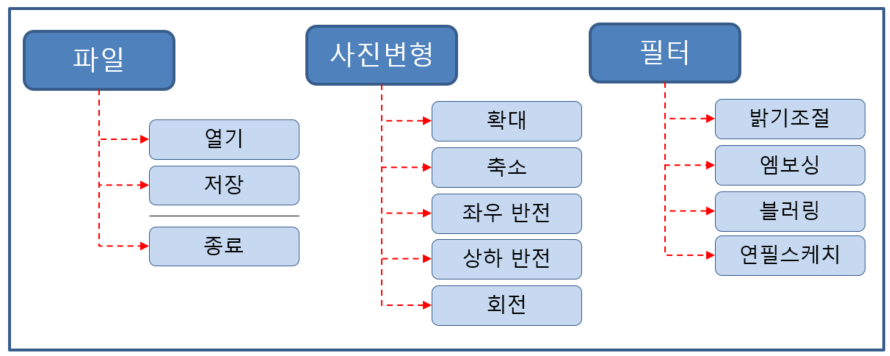  
  

## Pillow 라이브러리 활용
* 설치
  > pip install pillow
* 모듈 추가
  > from PIL import Image, ImageFilter, ImageEnhance, ImageOps, ImageTk
* 이미지 : test.png <br> 
  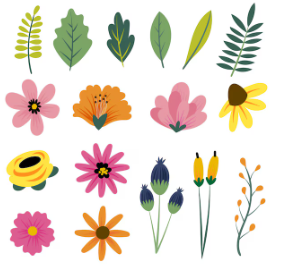
  
* Image모듈 사용 : 이미지 불러오기, 저장하기, 이미지 보기
  > from PIL import Image  
  > img = Image.open('test.png')  
  > img.save('test2.png')  
  > img.show()  


In [ ]:
# 전체 사용할 모듈
from PIL import Image, ImageFilter, ImageEnhance, ImageOps, ImageTk
# Image 모듈: 이미지 파일열기, 저장, 이미지보기, 속성보기, 자르기 등
img = Image.open('test.png')
img.save('save.png')
img.show() 
print(img.filename,',',img.format,',',img.size,',',img.width,',',img.height)

In [ ]:
!dir *.png                                                      

In [ ]:
# 현재 이미지 크기
print(img.size)
# 이미지 크기 변경
img_resize = img.resize((500,500))   
# 이미지 보기
img_resize.show()

In [ ]:
# 좌우 반전
img2 = img.transpose(Image.FLIP_LEFT_RIGHT)    
img2.show()

In [ ]:
# 상하 반전
img3 = img.transpose(Image.FLIP_TOP_BOTTOM)  
img3.show()

In [ ]:
# 회전
img4 = img.rotate(45, expand=True)   
img4.show()

In [ ]:
# 이미지 잘라내기
img5 = img.crop((50,50,250,250))    
img5.show()

## ImageEnhance 모듈 사용하기
* 밝게하기 : ImageEnhance.Brightness(img).enhance(3.0) 함수
* 어둡게하기 : ImageEnhance.Brightness(img).enhance(0.5) 함수

In [ ]:
# 밝게 하기
img6 = ImageEnhance.Brightness(img).enhance(3.0)    
img6.show()          

In [ ]:
img7 = ImageEnhance.Brightness(img).enhance(0.5)   
# 어둡게 하기
img7.show() 

In [ ]:
# 칼라 -> 흑백
img8 = ImageOps.grayscale(img)    
img8.show()

In [ ]:
# 엠보싱 효과
img9 = img.filter(ImageFilter.EMBOSS)    
img9.show()

In [ ]:
# 연필 스케치 효과
img10 = img.filter(ImageFilter.CONTOUR)  
img10.show()

In [ ]:
# 경계선 추출 효과
img11 = img.filter(ImageFilter.FIND_EDGES)   
img10.show()

In [ ]:
# 블러링 효과
img12 = img.filter(ImageFilter.BLUR)     
img12.show()

In [ ]:
# 외형 만들기
from tkinter import *                 # 메뉴 생성
from tkinter.filedialog import *      # 파일 읽기, 파일 저장
from tkinter.simpledialog import *    # 입력 대화상장 
from PIL import Image, ImageFilter, ImageEnhance, ImageOps, ImageTk
# 함수
def showPhoto(img,width,height) :   
    global win, canvas, inImg, outImg, inX, inY
    if canvas != None :
        canvas.destroy()
    win.geometry(f'{width}x{height}')
    cImage = ImageTk.PhotoImage(img)

    canvas = Canvas(win, width=width, height=height)
    canvas.create_image(0, 0,  anchor = NW, image=cImage)
    canvas.pack()
    win.mainloop()
def my_open() :     
    global win, canvas, inImg, outImg, inX, inY
    filename = askopenfilename(parent=win, filetypes=(("모든 그림 파일", "*.jpg;*.jpeg;*.bmp;*.png;*.tif"),  ("모든 파일", "*.*") ))
    inImg = Image.open(filename)
    inX = inImg.width
    inY = inImg.height

    outImg= inImg.copy()
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)
def my_save() :      
    pass
def my_exit() :
    win.quit()
    win.destroy()
def my_zoomin() :      
    pass
def my_zoomout() :    
    pass
def my_flip_r() :    
    pass
def my_flip_t() :      
    pass
def my_rotate() :      
    pass
def my_bright() :      
    pass
def my_embos() :       
    pass
def my_blur() :        
    pass
def my_sketch() :  
    pass
    

# 전역변수
win, canvas = None, None
inImg, outImg = None, None
inX, inY = 0, 0

# 메인 : Entry Point
win = Tk()
win.geometry("500x500")
win.title("사진편집도구")
mainMenu = Menu(win)
win.config(menu = mainMenu)

# 메뉴 : 파일
fileMenu = Menu(mainMenu)
mainMenu.add_cascade(label = "파일", menu = fileMenu)
fileMenu.add_command(label = "파일 열기", command = my_open)
fileMenu.add_command(label = "파일 저장", command = my_save)
fileMenu.add_separator()
fileMenu.add_command(label = "프로그램 종료", command = my_exit)

# 메뉴 : 사진변형
effect1Menu = Menu(mainMenu)
mainMenu.add_cascade(label="사진변형", menu = effect1Menu)
effect1Menu.add_command(label = "확대", command = my_zoomin)
effect1Menu.add_command(label = "축소", command= my_zoomout)
effect1Menu.add_separator()
effect1Menu.add_command(label = "상하 반전", command = my_flip_t)
effect1Menu.add_command(label = "좌우 반전", command = my_flip_r)
effect1Menu.add_command(label = "회전", command = my_rotate)

# 메뉴 : 필터
effect2Menu = Menu(mainMenu)
mainMenu.add_cascade(label = "필터", menu = effect2Menu)
effect2Menu.add_command(label = "밝기조절", command = my_bright)
effect2Menu.add_separator()
effect2Menu.add_command(label = "엠보싱", command = my_embos)
effect2Menu.add_separator()
effect2Menu.add_command(label = "블러링", command = my_blur)
effect2Menu.add_separator()
effect2Menu.add_command(label="연필스케치", command= my_sketch)

win.mainloop()

In [ ]:
# 메뉴 -> 열기(my_open) -> 이미지보기(showPhoto) 
def my_open() :     
    global win, canvas, inImg, outImg, inX, inY
    filename = askopenfilename(parent=win, filetypes=(("모든 그림 파일", "*.jpg;*.jpeg;*.bmp;*.png;*.tif"),  ("모든 파일", "*.*") ))
    inImg = Image.open(filename)
    inX = inImg.width
    inY = inImg.height

    outImg= inImg.copy()
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)

In [ ]:
# 이미지보기(showPhoto)
def showPhoto(img,width,height) :   
    global win, canvas, inImg, outImg, inX, inY
    if canvas != None :
        canvas.destroy()
    win.geometry(f'{width}x{height}')   # 윈도우 형태를 Canvas 크기로 조정
    cImage = ImageTk.PhotoImage(img)    # Image객체 -> Tkinter의 PhotoImage객체로 변환

    canvas = Canvas(win, width=width, height=height)
    canvas.create_image(0, 0,  anchor = NW, image=cImage)  # 캔버스내 기준좌표 설정
    canvas.pack()
    win.mainloop()

In [ ]:
# 이미지 새로운 파일로 저장
def my_save() :      
    global win, canvas, inImg, outImg, inX, inY
    if outImg == None:
        return
    saveFp = asksaveasfile(parent=win, mode="w", defaultextension=".png",
             filetypes=(("PNG 파일", "*.png;*.PNG"), ("모든 파일", "*.*")))
    outImg.save(saveFp.name)

In [ ]:
# 이미지 확대 zoomin
def my_zoomin() :      
    global win, canvas, inImg, outImg, inX, inY
    scale = askinteger("이미지확대", "확대 배수(2~8):", minvalue=2, maxvalue=8)
    outImg = inImg.copy()
    outImg = outImg.resize((int(inX * scale), int(inY * scale)))
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)


In [ ]:
# 이미지 축소 zoomout
def my_zoomout() :    
    global win, canvas, inImg, outImg, inX, inY
    scale = askinteger("이미지축소", "축소 배수(2~8):", minvalue=2, maxvalue=8)
    outImg = inImg.copy()
    outImg = outImg.resize((int(inX / scale), int(inY / scale)))
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)

In [ ]:
# 이미지 상하 반전 
def my_flip_t() :    
    global win, canvas, inImg, outImg, inX, inY
    outImg = inImg.copy()
    outImg = outImg.transpose(Image.FLIP_TOP_BOTTOM)
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)

def my_flip_r() :      
    global win, canvas, inImg, outImg, inX, inY
    outImg = inImg.copy()
    outImg = outImg.transpose(Image.FLIP_LEFT_RIGHT)
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)


In [ ]:
# 이미지 상하 반전 :: transpose
def my_flip_t() :    
    global win, canvas, inImg, outImg, inX, inY
    outImg = inImg.copy()
    outImg = outImg.transpose(Image.FLIP_TOP_BOTTOM)
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)

In [ ]:
# 이미지 좌우 반전 :: transpose
def my_flip_r() :      
    global win, canvas, inImg, outImg, inX, inY
    outImg = inImg.copy()
    outImg = outImg.transpose(Image.FLIP_LEFT_RIGHT)
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)

In [ ]:
# 이미지 회전 :: rotate
def my_rotate() :      
    global win, canvas, inImg, outImg, inX, inY
    degree = askinteger("회전","회전 각도(0~360):",minvalue=0,maxvalue=360)
    outImg = inImg.copy()
    outImg = outImg.rotate(degree, expand=True)
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)

In [ ]:
# 이미지 밝기 조절 :: ImageEnhance.Brightness(Image).enhance(value)
def my_bright() :      
    global win, canvas, inImg, outImg, inX, inY
    value=askfloat(＂밝기조절＂,＂휘도 입력(0.0~5.0)",minvalue=0.0,maxvalue=5.0)
    outImg = inImg.copy()
    outImg = ImageEnhance.Brightness(outImg).enhance(value)
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)

In [ ]:
# 엠보싱 효과  :: Image.filter(ImageFilter.EMBOSS)
def my_embos() :       
    global win, canvas, inImg, outImg, inX, inY
    outImg = inImg.copy()
    outImg = outImg.filter(ImageFilter.EMBOSS)
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)

In [ ]:
# 블러링 효과  :: Image.filter(ImageFilter.BLUR)
def my_blur() :        
    global win, canvas, inImg, outImg, inX, inY
    outImg = inImg.copy()
    outImg = outImg.filter(ImageFilter.BLUR)
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)

In [ ]:
# 연필 스케치 효과 :: Image.filter(ImageFilter.CONTOUR)
def my_sketch() :  
    global win, canvas, inImg, outImg, inX, inY
    outImg = inImg.copy()
    outImg = outImg.filter(ImageFilter.CONTOUR)
    outX = outImg.width 
    outY = outImg.height
    showPhoto(outImg, outX, outY)